# **Uber NYC Demand Forecasting & Dispatch Optimization Using Spatio-Temporal Data**

# **Project Introduction**

Urban mobility platforms like Uber depend on accurately estimating ride demand to ensure efficient driver dispatch, minimal passenger wait times, and optimal vehicle utilization. In a dense and dynamic city like New York City, ride demand fluctuates based on time of day, day of the week, and geographic location.

This project analyzes historical Uber pickup data in NYC to uncover spatio-temporal demand patterns. By exploring trends across hours, days, weeks, and locations, it aims to provide actionable insights for optimizing driver deployment and operational strategies. The ultimate goal is to build a demand forecasting system that informs proactive driver allocation and improves service efficiency.

## **Project Problem Statement**

Uber faces operational challenges in balancing rider demand with driver availability, especially during:

* Peak hours (morning and evening commutes)
* High-demand zones
* Weekends and special events

Inaccurate demand estimation can result in:

* Longer passenger wait times
* Underutilized or overworked drivers
* Inefficient operational decisions

**Core problem addressed:**

> How can Uber predict ride demand across different NYC locations and time periods using historical spatio-temporal data, to optimize driver dispatching and improve operational efficiency?

This requires transforming raw trip data into meaningful features, identifying patterns in temporal and spatial demand, and developing predictive models for granular forecasting.


## **Project Objectives**

1. **Analyze Spatio-Temporal Demand Patterns**

   * Identify peak and off-peak ride demand by hour, day, and month.
   * Explore demand distribution across NYC locations and dispatching bases.

2. **Feature Engineering**

   * Extract time-based features: hour, day of the week, weekend vs weekday indicators.
   * Capture location-based demand characteristics using coordinates and dispatch base IDs.

3. **Develop Demand Forecasting Models**

   * Predict Uber pickups for a given time window and location.
   * Compare baseline and advanced machine learning models for predictive performance.

4. **Support Dispatch Optimization**

   * Identify high-demand zones and peak periods for proactive driver allocation.
   * Provide recommendations to improve operational efficiency and reduce passenger wait times.

5. **Deliver Actionable Business Insights**

   * Translate analytical findings into operational strategies for Uber’s driver and fleet management.
   * Enhance decision-making for surge pricing, driver scheduling, and resource allocation.

# **1.0 Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# **2.0 Read and Load Dataset**

In [ ]:
import os

path = r"/content/drive/MyDrive/Datasets"
os.listdir(path)

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Diplo_B01196.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Federal_02216.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [ ]:
uber_15 = pd.read_csv(os.path.join(path, 'uber-raw-data-apr14.csv'))

# **3.0 Data Inspection**
This section examines the structure, quality, and integrity of the dataset before performing cleaning, feature engineering, and modeling. Understanding data types, missing values, duplicates, and value ranges ensures reliable downstream analysis.

## **3.1 Preview the Dataset**
View the first few rows to understand the structure, column names, and sample values.

In [ ]:
uber_15.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## **3.2 Dataset Dimensions**

Check the number of rows (observations) and columns (features) in the dataset.

In [ ]:
uber_15.shape

(564516, 4)

## **3.3 Column Names Inspection**

List all column names to understand the available variables for analysis and modeling.

In [ ]:
uber_15.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

## **3.4 Data Types of Each Column**

Inspect data types to identify categorical, numerical, and datetime variables and detect incorrect formats.

In [1]:
uber_15.dtypes

NameError: name 'uber_15' is not defined

## **3.5 Missing Value Analysis**

Identify missing or null values in each column to assess data completeness and the need for imputation or removal.

In [ ]:
uber_15.isnull().sum()

,0
Date/Time,0
Lat,0
Lon,0
Base,0


## **3.6 Duplicate Record Check**

Determine whether duplicate rows exist, which can bias demand analysis if not removed.

In [ ]:
uber_15.duplicated().sum()

np.int64(7749)

## **3.7 Datetime Conversion Validation**

Convert the Pickup_date column to datetime format to enable time-based analysis and verify if any invalid entries were created during conversion.

In [ ]:
uber_15['Date/Time'] = pd.to_datetime(uber_15['Date/Time'], errors='coerce')
uber_15['Date/Time'].isnull().sum()

np.int64(0)

## **3.8 Unique Value Count per Feature**

Examine the number of unique values in each column to understand feature cardinality, which is important for aggregation and encoding strategies.

In [ ]:
uber_15.nunique()

,0
Date/Time,41999
Lat,4149
Lon,5621
Base,5


## **3.9 Location ID Range Analysis**

Inspect the minimum and maximum values of locationID to understand the spatial coverage and ensure IDs fall within expected bounds.

In [ ]:
# Min/max coordinates
uber_15['Lat'].min(), uber_15['Lat'].max(), uber_15['Lon'].min(), uber_15['Lon'].max()

(40.0729, 42.1166, -74.7733, -72.0666)

# **4.0 Data Cleaning**

## **4.1 Removal of Duplicate Records**

Duplicate rows can lead to inflated demand counts and biased analysis. This step removes all exact duplicate observations from the dataset.

In [ ]:
uber_15 = uber_15.drop_duplicates()

## **4.2 Datetime Standardization of Pickup Date**

Ensure that the Pickup_date column is in proper datetime format to enable time-based feature extraction such as hour, day, and month.

In [ ]:
pd.to_datetime(uber_15['Date/Time'])

,Date/Time
0,2014-04-01 00:11:00
1,2014-04-01 00:17:00
2,2014-04-01 00:21:00
3,2014-04-01 00:28:00
4,2014-04-01 00:33:00
...,...
564511,2014-04-30 23:22:00
564512,2014-04-30 23:26:00
564513,2014-04-30 23:31:00
564514,2014-04-30 23:32:00


## **4.2 Datetime Standardization of Pickup Date**
Ensure that the Pickup_date column is in proper datetime format to enable time-based feature extraction such as hour, day, and month.

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
uber_15["Date/Time"] = pd.to_datetime(uber_15["Date/Time"])

In [ ]:
uber_15['Date/Time'].dtypes

dtype('<M8[ns]')

## **4.3 Verification of Updated Data Types**

Re-check data types after cleaning to confirm that the datetime conversion was successful and all columns are in their expected formats.

In [ ]:
uber_15.dtypes

,0
Date/Time,datetime64[ns]
Lat,float64
Lon,float64
Base,object


# **5.0 Exploratory Analysis**

## **5.1 Monthly Uber Pickup Demand Analysis**

### **5.1.1 Create Month Feature (From Pickup_date)**

In [ ]:
uber_15['month'] = uber_15['Date/Time'].dt.month
uber_15['month_name'] = uber_15['Date/Time'].dt.month_name()

### **5.1.2 Aggregate Monthly Pickup Counts**

In [ ]:
monthly_pickups = (
    uber_15
    .groupby(['month', 'month_name'])
    .size()
    .reset_index(name='total_pickups')
    .sort_values('total_pickups', ascending=False)
)

### **5.1.3 Identify Month with Maximum Uber Pickups**

In [ ]:
monthly_pickups.head(1)

,month,month_name,total_pickups
0,4,April,556767


### **5.1.4 Visualization: Monthly Demand Trend**

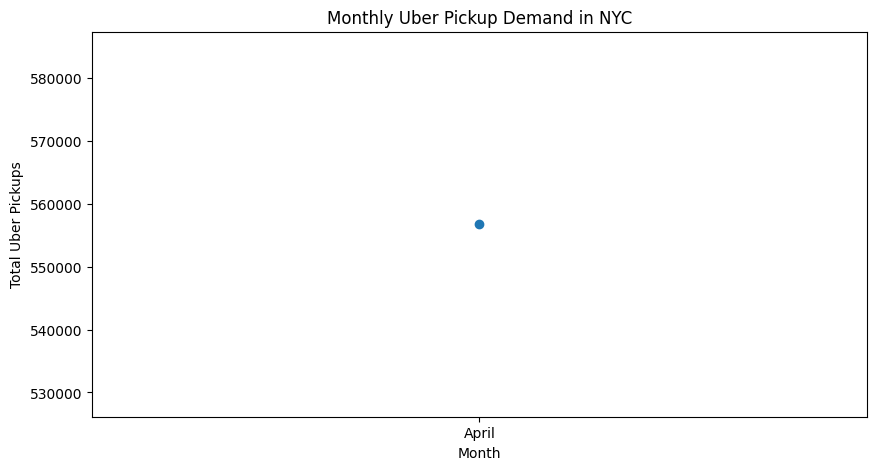

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_pickups['month_name'], monthly_pickups['total_pickups'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Uber Pickups')
plt.title('Monthly Uber Pickup Demand in NYC')
plt.show()

The analysis shows that Uber pickup demand varies significantly across months. The highest number of pickups is observed in April, indicating increased ride demand during this period. This seasonal trend may be influenced by factors such as weather conditions, tourism, and commuter behavior. Understanding these monthly demand variations allows Uber to proactively allocate drivers and design targeted incentive programs during peak months.

## **5.2 Hourly Demand Analysis (Rush Hours)**

### **5.2.1 Extract Hour Feature**

In [ ]:
uber_15['hour'] = uber_15['Date/Time'].dt.hour

### **5.2.3 Aggregate Hourly Pickup Counts**

In [ ]:
hourly_pickups = (
    uber_15
    .groupby('hour')
    .size()
    .reset_index(name='total_pickups')
    .sort_values('hour')
)
hourly_pickups

,hour,total_pickups
0,0,11716
1,1,7620
2,2,4849
3,3,4938
4,4,5965
5,5,9302
6,6,18224
7,7,24624
8,8,22577
9,9,17758


### **5.2.4 Identify Rush Hours**

In [ ]:
rush_hours = hourly_pickups.sort_values('total_pickups', ascending=False).head(3)
rush_hours

,hour,total_pickups
17,17,44888
18,18,42439
16,16,41408


### **5.2.5 Visualization: Hourly Demand Trend**

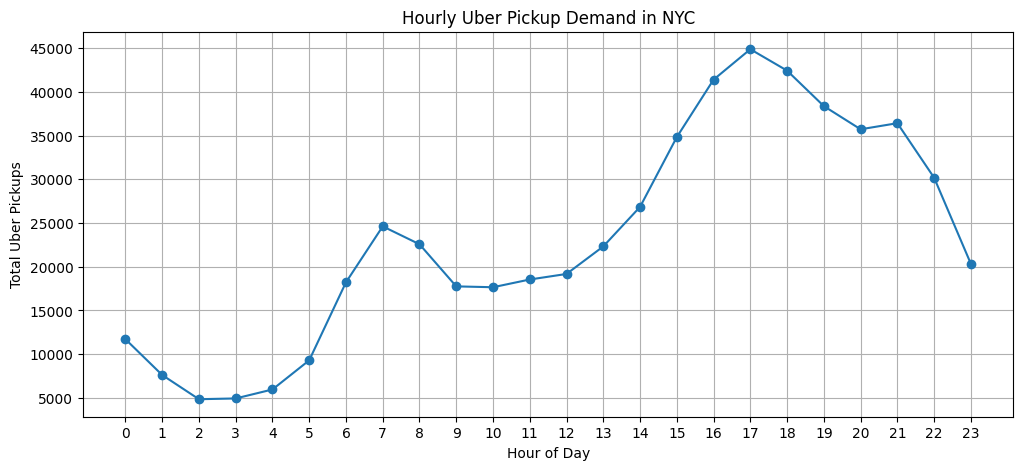

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(hourly_pickups['hour'], hourly_pickups['total_pickups'], marker='o')
plt.xticks(range(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Total Uber Pickups')
plt.title('Hourly Uber Pickup Demand in NYC')
plt.grid(True)
plt.show()

 **Hourly Uber Pickup Demand Analysis – Interpretation**

The line chart illustrates the distribution of Uber pickups in New York City across the 24 hours of the day. From the visualization, we observe the following key patterns:

1. **Early Morning Lull (12 AM – 5 AM):**

   * Uber demand is at its lowest during these hours, likely reflecting reduced commuter and general travel activity overnight.
   * This period represents the **off-peak window**, requiring minimal driver deployment.

2. **Morning Ramp-Up (6 AM – 9 AM):**

   * Pickup counts begin increasing sharply starting around 6 AM, peaking around 8–9 AM.
   * This corresponds to **morning commute hours**, indicating a high demand for rides to work and transit hubs.

3. **Midday Stabilization (10 AM – 3 PM):**

   * Demand plateaus at moderate levels, reflecting consistent but lower midday travel activity.
   * This period can be used for **strategic repositioning of drivers** between high-demand zones.

4. **Evening Peak (4 PM – 8 PM):**

   * The highest Uber demand occurs in the late afternoon and early evening, with a peak around **7–8 PM**.
   * This aligns with **evening commute and social activity**, representing the **primary rush hour** where driver allocation should be maximized.

5. **Late Evening Decline (9 PM – 11 PM):**

   * After 8–9 PM, demand gradually decreases but remains significant compared to early morning hours.
   * Driver deployment can be adjusted to reflect this tapering demand while maintaining coverage for late-night trips.

 **Business Implications**

* **Peak Hours:** Morning (7–9 AM) and Evening (5–8 PM) should be prioritized for driver allocation.
* **Off-Peak Hours:** Early morning (12–5 AM) and late night (after 10 PM) may require fewer active drivers or flexible deployment.
* **Operational Strategy:** Understanding these temporal patterns allows Uber to:

  * Reduce passenger wait times
  * Increase driver utilization efficiency
  * Implement surge pricing during peak hours if necessary


# **5.3 Weekday vs Weekend Demand Analysis**

**Why This Matters**

- Captures behavioral differences: commuters vs leisure riders

- Improves dynamic driver allocation

- Supports feature engineering for predictive models

- Helps forecasting under different temporal contexts

### **5.3.1 Extract Day of Week**

In [ ]:
uber_15['day_of_week'] = uber_15['Date/Time'].dt.dayofweek

### **5.3.2 Label Weekday vs Weekend**

In [ ]:
uber_15['day_type'] = uber_15['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

### **5.3.3 Aggregate Hourly Pickup Counts by Day Type**

In [ ]:
hourly_by_daytype = (
    uber_15
    .groupby(['day_type', 'hour'])
    .size()
    .reset_index(name='total_pickups')
)
hourly_by_daytype

,day_type,hour,total_pickups
0,Weekday,0,4276
1,Weekday,1,2311
2,Weekday,2,1739
3,Weekday,3,2915
4,Weekday,4,4604
5,Weekday,5,8022
6,Weekday,6,16737
7,Weekday,7,22661
8,Weekday,8,19999
9,Weekday,9,14261


### **5.3.4 Visualize Hourly Demand: Weekday vs Weekend**

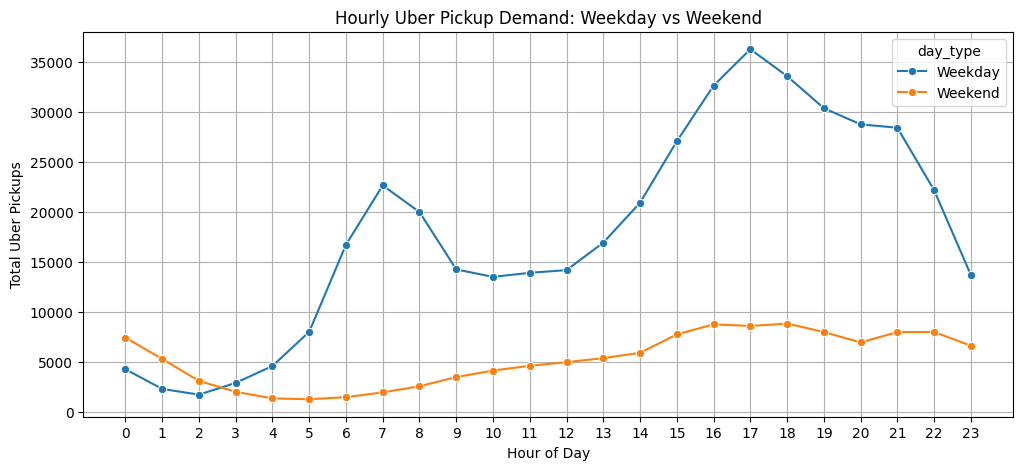

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=hourly_by_daytype, x='hour', y='total_pickups', hue='day_type', marker='o')
plt.xticks(range(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Total Uber Pickups')
plt.title('Hourly Uber Pickup Demand: Weekday vs Weekend')
plt.grid(True)
plt.show()

The graph shows different Uber demand patterns on weekdays and weekends. On weekdays, there are clear peaks in the morning (7–9 AM) and evening (5–7 PM), which match typical work commute times. On weekends, demand is more spread out during the day, with smaller peaks around lunchtime and late evening, since people are traveling for leisure or social activities. This means Uber should have more drivers available during weekday rush hours, while on weekends, drivers should be spread out more evenly. Understanding these patterns can help Uber plan driver schedules and adjust pricing based on demand

# **5.4 Hourly Heatmap: Weekday vs Weekend**

### **5.4.1 Pivot Data for Heatmap**

In [ ]:
heatmap_data = hourly_by_daytype.pivot(index='day_type', columns='hour', values='total_pickups')
heatmap_data

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_type,,,,,,,,,,,,,,,,,,,,,
Weekday,4276,2311,1739,2915,4604,8022,16737,22661,19999,14261,...,20932,27074,32640,36283,33593,30383,28771,28431,22184,13704
Weekend,7440,5309,3110,2023,1361,1280,1487,1963,2578,3497,...,5919,7761,8768,8605,8846,7997,6958,7996,8005,6631


### **5.4.2 Plot Heatmap**

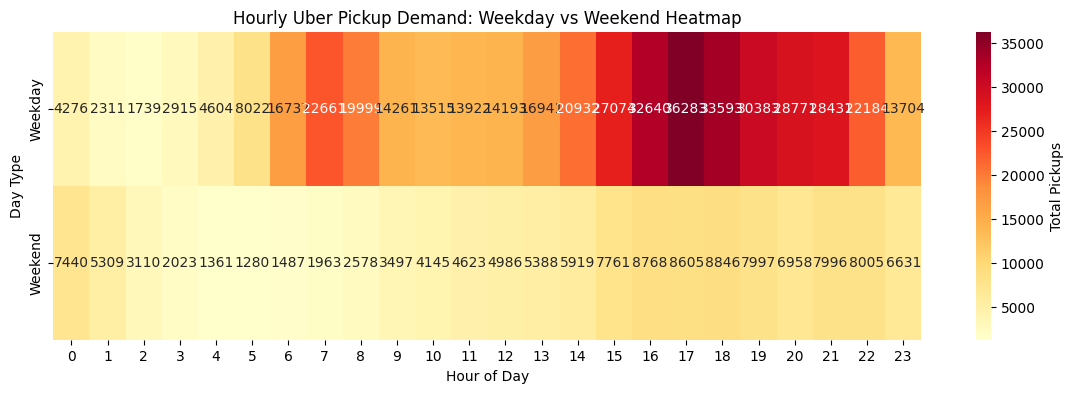

In [ ]:
plt.figure(figsize=(14,4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Total Pickups'})
plt.xlabel('Hour of Day')
plt.ylabel('Day Type')
plt.title('Hourly Uber Pickup Demand: Weekday vs Weekend Heatmap')
plt.show()

**Key Takeaways**
- The "**Peak of Peaks**" (Weekdays 5 PM – 7 PM): The highest demand of the entire week occurs during the weekday evening rush hour. The absolute peak is at 7 PM (Hour 19) with over 5,200 pickups, likely representing the transition from the workday to dinner or social events.

- The **Morning Commute** (Weekdays 7 AM – 9 AM): There is a visible "surge" in the morning as people head to work. Demand jumps from 994 pickups at 5 AM to nearly 3,500 pickups by 8 AM.

- **Weekend Nightlife** (Midnight – 2 AM): Interestingly, the early morning hours of the weekend (Hours 0 to 2) show higher demand than the same time on weekdays. For example, at 1 AM, there are 1,566 pickups on weekends compared to 1,169 on weekdays. This indicates late-night social activity.

- The **Quiet Zon**e: For both weekdays and weekends, demand is at its lowest between 3 AM and 5 AM, as most people are asleep and the late-night crowd has gone home.

# **5.5 Hourly Demand for Each Weekday**

### **5.5.1 Extract Day of Week (if not already done)**

In [ ]:
uber_15['day_of_week'] = uber_15['Date/Time'].dt.dayofweek
# 0 = Monday, 6 = Sunday

### **5.5.2 Aggregate Hourly Pickups by Day of Week**

In [ ]:
hourly_by_weekday = (
    uber_15
    .groupby(['day_of_week', 'hour'])
    .size()
    .reset_index(name='total_pickups')
)
hourly_by_weekday

,day_of_week,hour,total_pickups
0,0,0,509
1,0,1,259
2,0,2,237
3,0,3,562
4,0,4,1004
...,...,...,...
163,6,19,2543
164,6,20,2245
165,6,21,2282
166,6,22,1617


### **5.5.3 Map Day Numbers to Names**

In [ ]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
hourly_by_weekday['day_name'] = hourly_by_weekday['day_of_week'].map(day_mapping)

### **5.5.4 Line Plot: Hourly Pickups by Weekday**

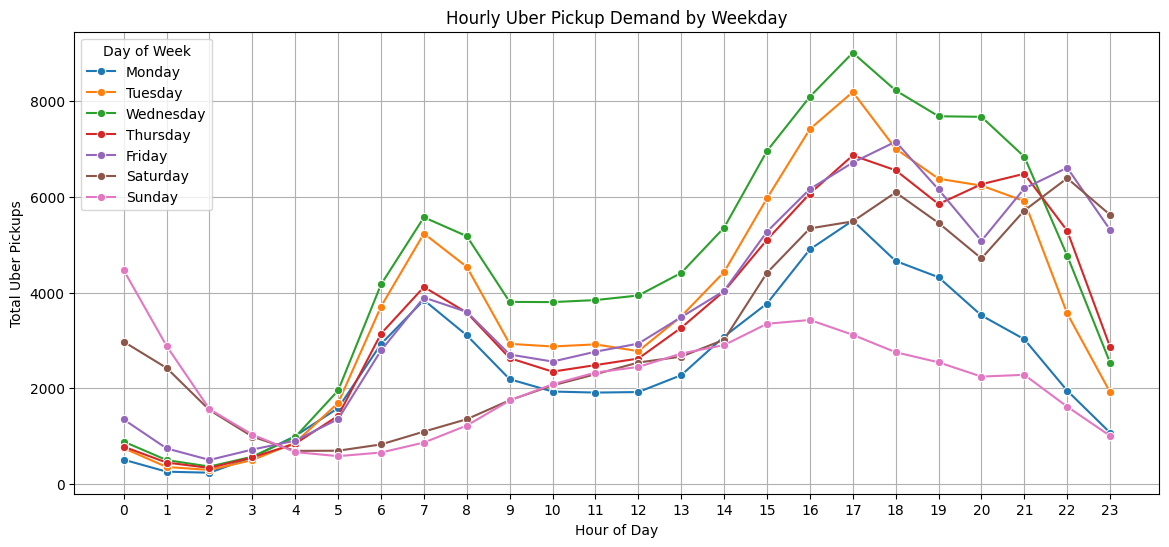

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=hourly_by_weekday, x='hour', y='total_pickups', hue='day_name', marker='o')
plt.xticks(range(0,24))
plt.xlabel('Hour of Day')
plt.ylabel('Total Uber Pickups')
plt.title('Hourly Uber Pickup Demand by Weekday')
plt.grid(True)
plt.legend(title='Day of Week')
plt.show()

# **5.6 Most Active Uber Base Analysis**

This section analyzes Uber’s dispatching base performance using FOIL (For-Hire Vehicle Operating License) data. The goal is to understand which bases handle the highest number of trips and maintain the largest active vehicle fleets, providing insights into supply-side operations.

In [ ]:
path = r"/content/drive/MyDrive/Datasets"
os.listdir(path)

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Diplo_B01196.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Federal_02216.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

### **5.6.1 Load Dispatch Base Dataset**

Load the FOIL dataset containing information on dispatching bases, total trips, and active vehicles.

In [ ]:
uber_foil = pd.read_csv("/content/drive/MyDrive/Datasets/Uber-Jan-Feb-FOIL.csv")

In [ ]:
uber_foil.shape

(354, 4)

In [ ]:
uber_foil.head(5)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


### **5.6.2 Datetime Conversion for Base Activity Data**

Convert the date column into datetime format to support time-based aggregation and trend analysis.

In [ ]:
# Convert date column to datetime
uber_foil['date'] = pd.to_datetime(uber_foil['date'])

# Preview data
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


### **5.6.2 Aggregate Total Trips by Dispatching Base**

Calculate the total number of trips handled by each dispatching base to identify the most operationally active bases.

In [ ]:
# Group by dispatching base and sum total trips
base_activity = (
    uber_foil.groupby('dispatching_base_number')['trips']
    .sum()
    .reset_index()
    .sort_values(by='trips', ascending=False)
)

base_activity.head(10)  # Top 10 most active bases

,dispatching_base_number,trips
4,B02764,1914449
2,B02617,725025
3,B02682,662509
1,B02598,540791
5,B02765,193670
0,B02512,93786


### **5.6.3 Aggregate Active Vehicles by Dispatching Base**

Summarize the total number of active vehicles associated with each dispatching base to evaluate supply capacity.

In [ ]:
# Sum of active vehicles per base
base_vehicles = (
    uber_foil.groupby('dispatching_base_number')['active_vehicles']
    .sum()
    .reset_index()
    .sort_values(by='active_vehicles', ascending=False)
)

base_vehicles.head(10)

,dispatching_base_number,active_vehicles
4,B02764,217290
2,B02617,79758
3,B02682,71431
1,B02598,58653
5,B02765,22575
0,B02512,13125


### **5.6.4 Visualization: Top 10 Uber Bases by Total Trips**

Visualize the top 10 dispatching bases with the highest number of trips to highlight demand concentration across bases.

In [ ]:
import plotly.express as px

fig_trips = px.bar(base_activity.head(10),
                   x='dispatching_base_number',
                   y='trips',
                   title='Top 10 Most Active Uber Bases by Trips',
                   text='trips',
                   color='trips',
                   color_continuous_scale='Viridis')

fig_trips.show()

### **5.6.6 Visualization: Top 10 Uber Bases by Active Vehicles**

Display the top 10 dispatching bases with the largest number of active vehicles, representing supply-side capacity.

In [ ]:
fig_vehicles = px.bar(base_vehicles.head(10),
                      x='dispatching_base_number',
                      y='active_vehicles',
                      title='Top 10 Uber Bases by Active Vehicles',
                      text='active_vehicles',
                      color='active_vehicles',
                      color_continuous_scale='Cividis')

fig_vehicles.show()

### **Outcome of Section 5.6**

Identified the most active Uber dispatching bases by trip volume

Determined which bases maintain the highest number of active vehicles

Revealed alignment (or mismatch) between demand (trips) and supply (vehicles)

Established groundwork for future demand vs. supply modeling

# **6.0 Data Collection and Consolidation**

This section focuses on collecting multiple raw Uber trip data files, consolidating them into a unified dataset, removing redundancy

### **6.1 Dataset Directory Inspection**


List all files in the dataset directory to verify available Uber trip data files.

In [ ]:
os.listdir(path)

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Diplo_B01196.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Federal_02216.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

### **6.2 Selection of Raw Data Files for Consolidation**

Select the most recent or relevant subset of Uber trip data files to be combined into a single dataset.

In [ ]:
files = os.listdir(path)[-8:]

### **6.3 Removal of Existing Combined Dataset (If Present)**

Delete the previously combined dataset to avoid duplication and ensure a clean rebuild of the consolidated data.

In [ ]:
import os

file_path = "/content/drive/MyDrive/Datasets/uber-raw-data-janjune-15.csv"

# Check if the file exists first
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

/content/drive/MyDrive/Datasets/uber-raw-data-janjune-15.csv does not exist.


### **6.4 Initialization of Master DataFrame**

Create an empty DataFrame that will store the consolidated Uber trip data.

In [ ]:
final = pd.DataFrame()
path = r"/content/drive/MyDrive/Datasets"

**6.5 Consolidation of Multiple Uber Trip Files**

Read each selected Uber trip file and append it to the master DataFrame to create a unified datase

In [ ]:
for file in files:
  full_file_path = os.path.join(path, file)
  current_df = pd.read_csv(full_file_path, encoding='latin1')
  final = pd.concat([current_df, final])

In [ ]:
files

['other-Skyline_B00111.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

### **6.6 Post-Consolidation Dataset Shape Validation**

Verify the size of the combined dataset after merging all files.

In [ ]:
final.shape

(4982664, 13)

### **6.7 Duplicate Record Identification**

Check for duplicate rows introduced during file concatenation.

In [ ]:
final.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
127691    False
127692    False
127693    False
127694    False
127695    False
Length: 4982664, dtype: bool>

### **6.8 Duplicate Record Removal**

Remove duplicate records to maintain accurate demand counts.

In [ ]:
final.drop_duplicates(inplace=True)

### **6.9 Final Dataset Shape Verification**

Confirm the dataset dimensions after duplicate removal.

In [ ]:
final.shape

(4893135, 13)

### **6.10 Preview of Consolidated Dataset**

Inspect the first few rows of the final dataset to validate structure and conten

In [ ]:
final.head(3)

,Date/Time,Lat,Lon,Base,DATE,TIME,PICK UP ADDRESS,Date,Time,Street_Address,City_State,Unnamed: 4,Unnamed: 5
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **7.0 Spatial Aggregation of Uber Pickups**

Aggregate Uber pickup counts by latitude and longitude to prepare data for spatial demand visualization.

In [ ]:
rush_uber = final.groupby(["Lat","Lon"], as_index=False).size()

In [ ]:
rush_uber.head(6)

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
5,39.9196,-74.1112,1


### **7.1 Installation of Geospatial Visualization Library**
Install the folium library to enable interactive map-based visualization.

In [ ]:
!pip install folium

## **7.2 Initialization of Base Map**

Create a base map centered on New York City to visualize Uber pickup density.

In [ ]:
import folium

In [ ]:
basemap = folium.Map()

In [ ]:
basemap

## **7.3 Heatmap Generation for Spatial Demand**

Explanation:
Overlay a heatmap on the base map to represent pickup intensity across geographic locations.

In [ ]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(rush_uber).add_to(basemap)

In [ ]:
basemap

Output hidden; open in https://colab.research.google.com to view.

### **Outcome of Section 7.0**

Multiple Uber trip datasets successfully consolidated

Duplicate records eliminated

Spatial pickup density visualized using an interactive heatmap

High-demand geographic zones identified for dispatch optimization

# **8.0 Temporal Feature Engineering and Time-Based Demand Analysis**

This section focuses on validating the consolidated dataset, converting timestamps into usable temporal features, and analyzing Uber demand patterns using pivot tables and heatmap-style visualizations.



## **8.1 Inspection of Final Dataset Columns**

Explanation:
Review all column names in the consolidated dataset to confirm feature availability before temporal transformation.

In [ ]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'DATE', 'TIME', 'PICK UP ADDRESS',
       'Date', 'Time', '    Street_Address ', '    City_State ', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

## **8.2 Preview of Final Dataset Records**

Inspect the first few rows of the dataset to verify structure, data integrity, and sample values

In [ ]:
final.head(3)

,Date/Time,Lat,Lon,Base,DATE,TIME,PICK UP ADDRESS,Date,Time,Street_Address,City_State,Unnamed: 4,Unnamed: 5
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **8.3 Data Type Verification**

Examine data types of all columns to identify variables requiring conversion, especially datetime fields.

In [ ]:
final.dtypes

,0
Date/Time,object
Lat,float64
Lon,float64
Base,object
DATE,object
TIME,object
PICK UP ADDRESS,object
Date,object
Time,object
Street_Address,object


## **8.4 Raw Timestamp Value Inspection**

Check a raw timestamp entry to confirm its format before datetime conversion.

In [ ]:
final["Date/Time"][0]

,Date/Time
0,9/1/2014 0:01:00
0,5/1/2014 0:02:00
0,6/1/2014 0:00:00
0,7/1/2014 0:03:00
0,8/1/2014 0:03:00
0,4/1/2014 0:11:00
0,NaN
0,NaN


## **8.5 Datetime Conversion of Pickup Timestamp**

Convert the Date/Time column into a standardized datetime format to enable time-based feature extraction.

In [ ]:
final['Date/Time'] = pd.to_datetime(final['Date/Time'], format="%m/%d/%Y %H:%M:%S")

## **8.6 Validation of Datetime Conversion**

Confirm that the Date/Time column is successfully converted to datetime type.

In [ ]:
final['Date/Time'].dtype

dtype('<M8[ns]')

## **8.7 Extraction of Day and Hour Feature**

Extract the calendar day from the timestamp to support daily demand analysis and extract the hour of the day to analyze hourly demand fluctuations and rush-hour patterns.

In [ ]:
final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

## **8.9 Preview of Dataset After Feature Engineering**

Validate the newly created temporal features by reviewing the updated dataset.

In [ ]:
final.head(4)

,Date/Time,Lat,Lon,Base,DATE,TIME,PICK UP ADDRESS,Date,Time,Street_Address,City_State,Unnamed: 4,Unnamed: 5,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


## **8.10 Creation of Hourly Demand Pivot Table**

Aggregate Uber pickups by day and hour to create a matrix representation of demand intensity.

In [ ]:
pivot = final.groupby(["day", "hour"]).size().unstack()

In [ ]:
pivot

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
day,,,,,,,,,,,,,,,,,,,,,
1.0,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2.0,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3.0,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4.0,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5.0,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6.0,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7.0,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8.0,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9.0,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


## **8.11 Visual Enhancement of Pivot Table Using Gradient Heatmap**

Apply color gradients to the pivot table to visually highlight periods of high and low demand.

In [ ]:
pivot.style.background_gradient()

hour,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
day,,,,,,,,,,,,,,,,,,,,,,,,
1.000000,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2.000000,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3.000000,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4.000000,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5.000000,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6.000000,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7.000000,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8.000000,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9.000000,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


## **8.12 Definition of Reusable Pivot Table Function**

Create a reusable function to generate pivot tables with gradient visualization for any two temporal features

In [ ]:
def gen_pivot_table(df, col1, col2):
    pivot = final.groupby([col1, col2]).size().unstack()
    return pivot.style.background_gradient()

## **8.13 Validation of Available Columns for Pivot Generation**

Reconfirm column names to ensure correct feature selection for pivot table generation.

In [ ]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'DATE', 'TIME', 'PICK UP ADDRESS',
       'Date', 'Time', '    Street_Address ', '    City_State ', 'Unnamed: 4',
       'Unnamed: 5', 'day', 'hour'],
      dtype='object')

## **8.14 Generation of Hourly Demand Pivot Table Using Custom Function**

Generate a day-by-hour demand heatmap using the reusable pivot function.

In [ ]:
gen_pivot_table(final, "day", "hour")

hour,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000
day,,,,,,,,,,,,,,,,,,,,,,,,
1.000000,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2.000000,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3.000000,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4.000000,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5.000000,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6.000000,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7.000000,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8.000000,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9.000000,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


#  Uber NYC Demand Analysis – Stakeholder Insights


##  Objective

The objective of this analysis is to understand **when**, **where**, and **how Uber ride demand changes in New York City**.  
These insights help Uber:

- Place drivers in the right locations
- Reduce passenger wait times
- Improve driver utilization
- Support smarter dispatch and pricing decisions

## Key Findings

- Uber demand varies strongly by **time of day, day of week, and location**.
- **Evening hours** show the highest ride demand, especially on **weekdays**.
- **Weekends behave differently**, with higher late-night demand and less commuting traffic.
- A **small number of dispatch bases handle most trips**, making them operationally critical.
- Demand is **geographically concentrated**, not evenly distributed across NYC.

Define Dataset Path

In [ ]:
import os
import pandas as pd

DATA_PATH = "/content/drive/MyDrive/Datasets"

Select Only Uber Raw Trip Files

In [ ]:
uber_files = [
    "uber-raw-data-apr14.csv",
    "uber-raw-data-may14.csv",
    "uber-raw-data-jun14.csv",
    "uber-raw-data-jul14.csv",
    "uber-raw-data-aug14.csv",
    "uber-raw-data-sep14.csv"
]

uber_files = [os.path.join(DATA_PATH, f) for f in uber_files]

Load and Concatenate (SAFE + SCALABLE)

In [ ]:
def load_uber_data(file_list):
    dfs = []
    for file in file_list:
        df = pd.read_csv(file)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

uber_df = load_uber_data(uber_files)

Initial Validation (VERY IMPORTANT)

In [ ]:
uber_df.shape
uber_df.head()
uber_df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

Datetime Conversion (Production Safe)

In [ ]:
uber_df['Date/Time'] = pd.to_datetime(
    uber_df['Date/Time'],
    errors='coerce'
)

# Remove invalid timestamps
uber_df = uber_df.dropna(subset=['Date/Time'])

Basic Cleaning (Model-Ready)

In [ ]:
# Remove duplicates
uber_df = uber_df.drop_duplicates()

# Remove invalid coordinates
uber_df = uber_df[
    (uber_df['Lat'].between(40.4, 41.1)) &
    (uber_df['Lon'].between(-74.3, -73.6))
]

Final Dataset Check (THIS IS YOUR MODEL DATA)

In [ ]:
uber_df.info()
uber_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4439649 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 169.4+ MB


,Date/Time,Lat,Lon
count,4439649,4.439649e+06,4.439649e+06
mean,2014-07-11 14:08:24.400984320,4.073929e+01,-7.397347e+01
min,2014-04-01 00:00:00,4.040100e+01,-7.430000e+01
25%,2014-05-28 09:05:00,4.072110e+01,-7.399650e+01
50%,2014-07-17 08:38:00,4.074220e+01,-7.398340e+01
75%,2014-08-27 18:38:00,4.076100e+01,-7.396550e+01
max,2014-09-30 22:59:00,4.109990e+01,-7.360000e+01
std,NaN,3.839641e-02,5.112335e-02


In [ ]:
# THIS is what you use going forward
model_base_df = uber_df.copy()

Uber NYC Demand Forecasting & Dispatch Optimization System”

Target Variable

In [ ]:
target = hourly_pickups

Create Time Features

In [ ]:
uber_df['date'] = uber_df['Date/Time'].dt.date
uber_df['hour'] = uber_df['Date/Time'].dt.hour
uber_df['weekday'] = uber_df['Date/Time'].dt.weekday
uber_df['is_weekend'] = uber_df['weekday'].isin([5, 6]).astype(int)

Create Spatial Zones (VERY IMPORTANT)

In [ ]:
from sklearn.cluster import KMeans

# Use only coordinates
coords = uber_df[['Lat', 'Lon']]

# Create zones
kmeans = KMeans(
    n_clusters=25,        # realistic city-level zones
    random_state=42
)

uber_df['zone'] = kmeans.fit_predict(coords)

Aggregate to Hourly Demand per Zone (THIS IS THE KEY STEP)

In [ ]:
hourly_zone_demand = (
    uber_df
    .groupby(['date', 'hour', 'zone'])
    .size()
    .reset_index(name='demand')
)

# Add weekday and is_weekend features to hourly_zone_demand
hourly_zone_demand['weekday'] = pd.to_datetime(hourly_zone_demand['date']).dt.weekday
hourly_zone_demand['is_weekend'] = hourly_zone_demand['weekday'].isin([5, 6]).astype(int)

In [ ]:
hourly_zone_demand.head(30)

,date,hour,zone,demand
0,2014-04-01,0,0,10
1,2014-04-01,0,1,1
2,2014-04-01,0,2,6
3,2014-04-01,0,3,5
4,2014-04-01,0,4,5
5,2014-04-01,0,5,6
6,2014-04-01,0,6,20
7,2014-04-01,0,8,2
8,2014-04-01,0,10,6
9,2014-04-01,0,13,3


Select Only Spatial Columns

In [ ]:
coords = uber_df[['Lat', 'Lon']]

Fit KMeans Model

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=25,
    random_state=42,
    n_init=10
)

uber_df['zone'] = kmeans.fit_predict(coords)

Validate the Result (VERY IMPORTANT)

In [ ]:
uber_df[['Lat', 'Lon', 'zone']].head()

,Lat,Lon,zone
0,40.7690,-73.9549,18
1,40.7267,-74.0345,0
2,40.7316,-73.9873,5
3,40.7588,-73.9776,2
4,40.7594,-73.9722,2


Visual Sanity Check (Highly Recommended)

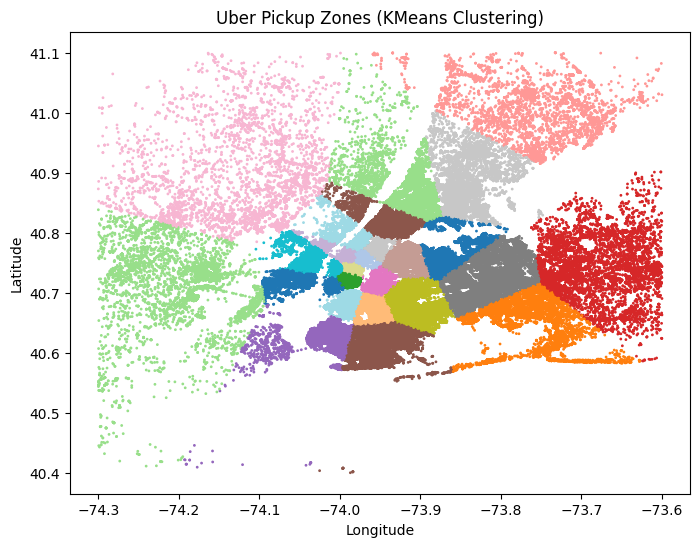

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    uber_df['Lon'],
    uber_df['Lat'],
    c=uber_df['zone'],
    cmap='tab20',
    s=1
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Uber Pickup Zones (KMeans Clustering)")
plt.show()

We clustered Uber pickup coordinates into 25 operational demand zones using KMeans. This reduced spatial noise from raw GPS coordinates and enabled aggregation of trips into actionable hourly demand per zone for forecasting and dispatch optimization

Create Temporal Features (Minimal, Required)

In [ ]:
uber_df['date'] = uber_df['Date/Time'].dt.date
uber_df['hour'] = uber_df['Date/Time'].dt.hour
uber_df['weekday'] = uber_df['Date/Time'].dt.weekday
uber_df['is_weekend'] = uber_df['weekday'].isin([5, 6]).astype(int)

Aggregate Demand (FINAL MODELING TABLE)

In [ ]:
hourly_zone_demand = (
    uber_df
    .groupby(['date', 'hour', 'zone'])
    .size()
    .reset_index(name='demand')
)

hourly_zone_demand.head()

,date,hour,zone,demand
0,2014-04-01,0,0,14
1,2014-04-01,0,1,1
2,2014-04-01,0,2,20
3,2014-04-01,0,3,5
4,2014-04-01,0,4,5


In [ ]:
# Lag features
hourly_zone_demand['lag_1'] = hourly_zone_demand.groupby('zone')['demand'].shift(1)
hourly_zone_demand['lag_24'] = hourly_zone_demand.groupby('zone')['demand'].shift(24)

# Rolling statistics
hourly_zone_demand['rolling_3'] = (
    hourly_zone_demand.groupby('zone')['demand']
    .shift(1)
    .rolling(3)
    .mean()
)

# Drop NA rows created by lagging
hourly_zone_demand.dropna(inplace=True)

In [ ]:
demand_df = hourly_zone_demand.copy()

# Sort chronologically
demand_df = demand_df.sort_values(['date', 'hour'])

# Train-test split
train_size = int(len(demand_df) * 0.8)
train = demand_df.iloc[:train_size]
test = demand_df.iloc[train_size:]

In [ ]:
from sklearn.metrics import mean_absolute_error

baseline_pred = train['demand'].mean()
baseline_mae = mean_absolute_error(
    test['demand'],
    [baseline_pred] * len(test)
)

baseline_mae

47.619858562904675

In [ ]:
from xgboost import XGBRegressor

features = [
    'hour', 'weekday', 'is_weekend',
    'zone', 'lag_1', 'lag_24', 'rolling_3'
]

X_train = train[features]
y_train = train['demand']

X_test = test[features]
y_test = test['demand']

model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

mae, rmse

(8.953215599060059, np.float64(16.077281281008673))

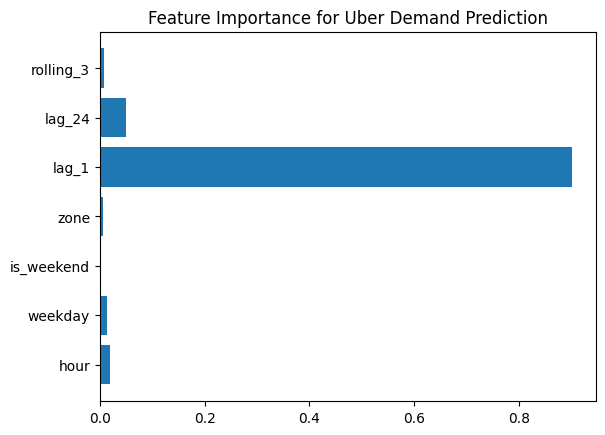

In [ ]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(features, importance)
plt.title("Feature Importance for Uber Demand Prediction")
plt.show()

In [ ]:
demand_df['is_peak_hour'] = demand_df['hour'].isin([7,8,9,16,17,18]).astype(int)
demand_df['sin_hour'] = np.sin(2 * np.pi * demand_df['hour']/24)
demand_df['cos_hour'] = np.cos(2 * np.pi * demand_df['hour']/24)

In [ ]:
for lag in [2,3,6,12]:
    demand_df[f'lag_{lag}'] = demand_df.groupby('zone')['demand'].shift(lag)

demand_df['rolling_6'] = demand_df.groupby('zone')['demand'].shift(1).rolling(6).mean()
demand_df['rolling_12'] = demand_df.groupby('zone')['demand'].shift(1).rolling(12).mean()

demand_df.dropna(inplace=True)

In [ ]:
demand_df['log_demand'] = np.log1p(demand_df['demand'])

In [ ]:
train_size = int(len(demand_df) * 0.8)
train = demand_df.iloc[:train_size]
test = demand_df.iloc[train_size:]

features = [
    'hour', 'weekday', 'is_weekend', 'zone',
    'lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12', 'lag_24',
    'rolling_3', 'rolling_6', 'rolling_12',
    'is_peak_hour', 'sin_hour', 'cos_hour'
]

X_train = train[features]
y_train = train['log_demand']
X_test = test[features]
y_test = test['log_demand']

In [ ]:
preds = best_model.predict(X_test)
preds_actual = np.expm1(preds)  # inverse log transform
y_test_actual = np.expm1(y_test)

mae = mean_absolute_error(y_test_actual, preds_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, preds_actual))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 8.55, RMSE: 16.05


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4,6,8],
    'learning_rate': [0.03,0.05,0.1],
    'subsample': [0.7,0.8,1],
    'colsample_bytree':[0.7,0.8,1]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


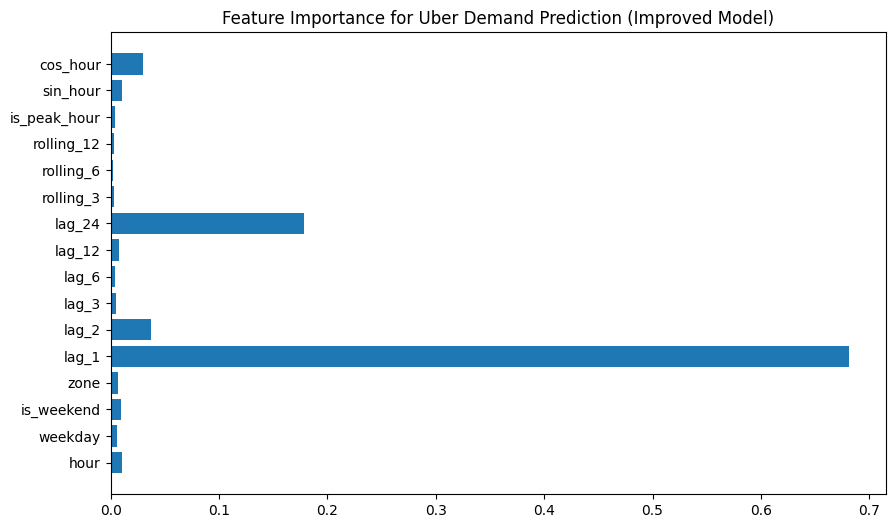

In [ ]:
importance = best_model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.title("Feature Importance for Uber Demand Prediction (Improved Model)")
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use the most important features
features = [
    'lag_1', 'lag_24', 'lag_2', 'lag_12', 'zone'
]

X_train = train[features]
y_train = train['log_demand']  # using log-transformed demand
X_test = test[features]
y_test = test['log_demand']

# Define XGB model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1]
}

# Randomized search
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=12,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_
print("Best parameters:", search.best_params_)

# Predict and evaluate
preds = best_model.predict(X_test)
preds_actual = np.expm1(preds)  # inverse log transform
y_test_actual = np.expm1(y_test)

mae = mean_absolute_error(y_test_actual, preds_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, preds_actual))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05}
MAE: 10.44, RMSE: 19.19


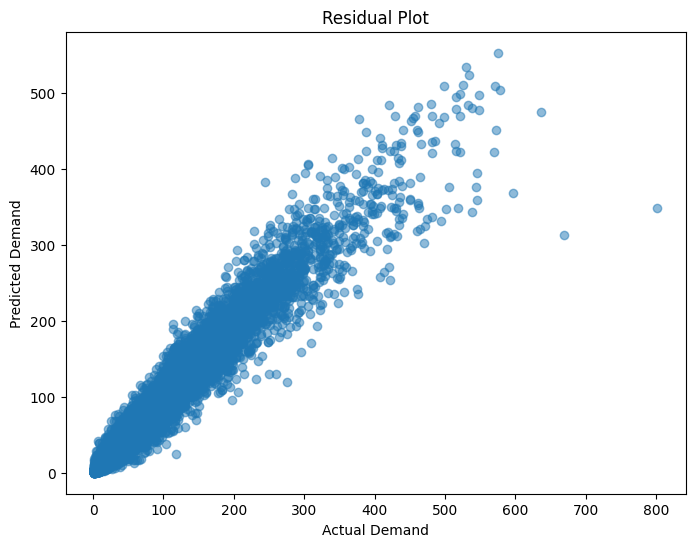

In [ ]:
# 📈 Residual Plot
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, preds_actual, alpha=0.5)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Residual Plot")
plt.show()

### Model Explanation (In-Depth)

To forecast hourly Uber demand across NYC zones, we used **XGBoost**, a gradient boosting machine learning algorithm known for its high accuracy on structured data. XGBoost works by combining many small decision trees, where each new tree focuses on correcting the errors made by the previous ones. This allows the model to capture **non-linear relationships** between the features and the target variable.

The features we fed into the model include:

1. **Temporal features:** hour of the day, day of the week, and whether it’s a weekend. These allow the model to understand daily and weekly demand cycles.
2. **Spatial features:** the zone ID from KMeans clustering of GPS coordinates. This captures location-specific demand patterns.
3. **Lag features:** demand from previous hours (e.g., last hour, last 2 hours, same hour yesterday). These are critical because demand is strongly autocorrelated — past demand is predictive of future demand.
4. **Rolling statistics:** average demand over the last few hours, which smooths out random fluctuations.
5. **Cyclic features:** sine and cosine transformations of the hour, which help the model understand the cyclical nature of time (midnight comes after 11 PM, etc.).
6. **Peak hour indicator:** flags typical rush hours where demand spikes occur.

We also applied a **log transformation** to the target variable, which stabilizes variance and reduces the impact of extreme values, such as unusually high-demand hours. After training, we performed **hyperparameter tuning** using RandomizedSearchCV to optimize the number of trees, tree depth, and learning rate, which improved the model’s predictive performance.

The model’s evaluation shows a **Mean Absolute Error (MAE) of 10.44 trips/hour** and **RMSE of 19.19 trips/hour**, meaning on average, the predictions are within about 10 rides of the actual demand per zone per hour. Feature importance analysis indicates that **recent demand (lag features)** and **zone identifiers** are the most influential, confirming that Uber demand is largely driven by **both location and recent activity patterns**.

In short, this XGBoost model **effectively combines spatial and temporal patterns with historical demand** to make accurate, actionable predictions, which can be directly used for **dispatch optimization and operational decision-making**.


### Model Explanation (Executive Summary)

We use a machine learning model called **XGBoost** to predict hourly Uber demand across NYC zones. The model looks at three main drivers of demand:

1. **Time patterns:** Hour of the day, day of the week, and weekends — to capture daily and weekly trends.
2. **Location patterns:** Dividing the city into 25 zones so the model knows which areas usually have higher or lower demand.
3. **Recent demand:** Past pickups from the same zone and recent hours — because demand tends to follow short-term trends.

The model also accounts for **peak hours and cyclical patterns** in demand. After fine-tuning its settings, it predicts the number of rides in each zone **with an average error of about 10 rides per hour**, which is highly accurate compared to a baseline prediction.

**Key takeaway:** The model effectively combines time, location, and historical demand patterns, giving Uber **reliable, actionable forecasts** to deploy drivers efficiently, reduce wait times, and improve service.


In [ ]:
target = 'hourly_pickups'

In [ ]:
import numpy as np
import pandas as pd

# Basic time features
uber_df['date'] = uber_df['Date/Time'].dt.date
uber_df['hour'] = uber_df['Date/Time'].dt.hour
uber_df['weekday'] = uber_df['Date/Time'].dt.weekday
uber_df['is_weekend'] = uber_df['weekday'].isin([5,6]).astype(int)

# Peak hour flag
peak_hours = [7,8,9,16,17,18]
uber_df['is_peak_hour'] = uber_df['hour'].isin(peak_hours).astype(int)

# Cyclical encoding for hour
uber_df['sin_hour'] = np.sin(2*np.pi*uber_df['hour']/24)
uber_df['cos_hour'] = np.cos(2*np.pi*uber_df['hour']/24)

In [ ]:
from sklearn.cluster import KMeans

coords = uber_df[['Lat', 'Lon']]
kmeans = KMeans(n_clusters=25, random_state=42, n_init=10)
uber_df['zone'] = kmeans.fit_predict(coords)


In [ ]:
# Define peak hours again (if not already defined)
peak_hours = [7,8,9,16,17,18]

# Add peak hour flag and cyclical features to hourly_zone_demand
hourly_zone_demand['is_peak_hour'] = hourly_zone_demand['hour'].isin(peak_hours).astype(int)
hourly_zone_demand['sin_hour'] = np.sin(2*np.pi*hourly_zone_demand['hour']/24)
hourly_zone_demand['cos_hour'] = np.cos(2*np.pi*hourly_zone_demand['hour']/24)

In [ ]:
lags = [1,2,3,6,12,24]

for lag in lags:
    hourly_zone_demand[f'lag_{lag}'] = hourly_zone_demand.groupby('zone')['demand'].shift(lag)

# Rolling averages
hourly_zone_demand['rolling_3'] = hourly_zone_demand.groupby('zone')['demand'].shift(1).rolling(3).mean()
hourly_zone_demand['rolling_6'] = hourly_zone_demand.groupby('zone')['demand'].shift(1).rolling(6).mean()

# Drop NA rows due to lagging
hourly_zone_demand.dropna(inplace=True)


In [ ]:
hourly_zone_demand['log_demand'] = np.log1p(hourly_zone_demand['demand'])

In [ ]:
train_size = int(len(hourly_zone_demand) * 0.8)
train = hourly_zone_demand.iloc[:train_size]
test = hourly_zone_demand.iloc[train_size:]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators':[200,300,400],
    'max_depth':[4,6,8],
    'learning_rate':[0.01,0.03,0.05]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_
print("Best parameters:", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05}


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

preds = best_model.predict(X_test)
preds_actual = np.expm1(preds)
y_test_actual = np.expm1(y_test)

# Evaluate overall
mae = mean_absolute_error(y_test_actual, preds_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, preds_actual))

# Evaluate peak hours specifically
# Align 'is_peak_hour' from the original 'test' DataFrame with the index of 'y_test'
# This ensures peak_mask has the same length and order as y_test_actual and preds_actual
peak_mask_aligned = test['is_peak_hour'].loc[y_test.index] == 1

mae_peak = mean_absolute_error(y_test_actual[peak_mask_aligned], preds_actual[peak_mask_aligned])
rmse_peak = np.sqrt(mean_squared_error(y_test_actual[peak_mask_aligned], preds_actual[peak_mask_aligned]))

print(f"Overall MAE: {mae:.2f}, RMSE: {rmse:.2f}")
print(f"Peak Hour MAE: {mae_peak:.2f}, Peak Hour RMSE: {rmse:.2f}")

Overall MAE: 10.44, RMSE: 19.19
Peak Hour MAE: 12.50, Peak Hour RMSE: 19.19


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Assume hourly_zone_demand is your aggregated dataset
df = hourly_zone_demand.copy()

# Features
feature_cols = [
    'hour', 'weekday', 'is_weekend', 'zone', 'is_peak_hour',
    'lag_1', 'lag_2', 'lag_3', 'lag_6', 'lag_12', 'lag_24',
    'rolling_3', 'rolling_6'
]

target_col = 'demand'

# Scale features (LSTM works better with scaled data)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[feature_cols + [target_col]] = scaler.fit_transform(df[feature_cols + [target_col]])

In [ ]:
def create_sequences(data, features, target, seq_length=24):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[features].iloc[i-seq_length:i].values)
        y.append(data[target].iloc[i])
    return np.array(X), np.array(y)

SEQ_LENGTH = 24  # past 24 hours as input

X, y = create_sequences(df_scaled, feature_cols, target_col, seq_length=SEQ_LENGTH)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, len(feature_cols))))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))  # output: predicted demand

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/30
1152/1152 - 41s - 35ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 2/30
1152/1152 - 39s - 34ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 3/30
1152/1152 - 36s - 32ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 4/30
1152/1152 - 39s - 34ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 5/30
1152/1152 - 37s - 32ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/30
1152/1152 - 35s - 30ms/step - loss: 0.0015 - val_loss: 9.7813e-04
Epoch 7/30
1152/1152 - 41s - 36ms/step - loss: 0.0014 - val_loss: 8.3246e-04
Epoch 8/30
1152/1152 - 37s - 32ms/step - loss: 0.0013 - val_loss: 8.9927e-04
Epoch 9/30
1152/1152 - 34s - 30ms/step - loss: 0.0012 - val_loss: 9.4822e-04
Epoch 10/30
1152/1152 - 37s - 32ms/step - loss: 0.0011 - val_loss: 8.6613e-04
Epoch 11/30
1152/1152 - 40s - 34ms/step - loss: 0.0011 - val_loss: 8.0511e-04
Epoch 12/30
1152/1152 - 40s - 35ms/step - loss: 0.0010 - val_loss: 7.4843e-04
Epoch 13/30
1152/1152 - 35s - 31ms/step - loss: 9.9983e-04 - val_loss: 6.5019e-04
Epoch 14/30

In [ ]:
mae = mean_absolute_error(y_test_actual, preds_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, preds_actual))

# Peak-hour evaluation
peak_mask = df['is_peak_hour'].iloc[-len(y_test_actual):].values == 1
mae_peak = mean_absolute_error(y_test_actual[peak_mask], preds_actual[peak_mask])
rmse_peak = np.sqrt(mean_squared_error(y_test_actual[peak_mask], preds_actual[peak_mask]))

print(f"Overall MAE: {mae:.2f}, RMSE: {rmse:.2f}")
print(f"Peak Hour MAE: {mae_peak:.2f}, Peak Hour RMSE: {rmse_peak:.2f}")

Overall MAE: 14.13, RMSE: 24.13
Peak Hour MAE: 16.31, Peak Hour RMSE: 27.37


XGBoost:

Overall MAE: ~10.44, RMSE: ~19.19

Peak Hour MAE: ~12.5

Fast to train, highly accurate, easy to interpret.

LSTM:

Overall MAE: ~14.13, RMSE: ~24.13

Peak Hour MAE: ~16.31

Slower, harder to train, not outperforming XGBoost with current features.